# Usage example: State-based connectivity

Currently, Comet includes five state-based dFC methods as published in:

> Mohammad Torabi, Georgios D Mitsis, Jean-Baptiste Poline, On the variability of dynamic functional connectivity<br>assessment methods, GigaScience, Volume 13, 2024, giae009, https://doi.org/10.1093/gigascience/giae009.

- Sliding Window Clustering
- Coactivation Patterns
- Continuous Hidden Markov Model
- Discrete Hidden Markov Model
- Windowless (K-SVD) Model

State-based connectivity analysis requires data from multiple subjects, so we start by getting some pre-processed time series data from the ABIDE dataset which we put in a list (a single 3D numpy array would also be fine):

In [1]:
import numpy as np
from nilearn import datasets
from matplotlib import pyplot as plt
from comet import connectivity

subjects = ["50008", "50010", "50012", "50014", "50020"]
data = datasets.fetch_abide_pcp(SUB_ID=subjects, pipeline='cpac', band_pass_filtering=True, derivatives="rois_dosenbach160", legacy_format=False)
ts = data.rois_dosenbach160 # list of 2D time series data

print("Num subjects:",len(ts))
print("TS shape:", ts[0].shape)

[get_dataset_dir] Dataset found in /home/mibur/nilearn_data/ABIDE_pcp

Num subjects: 5
TS shape: (196, 161)


We can then calculate state-based functional connectivity with any of the methods, e.g.:

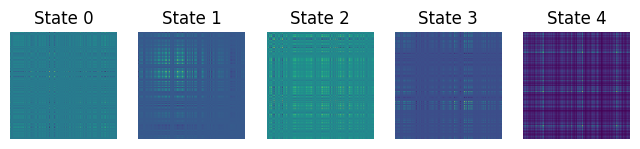

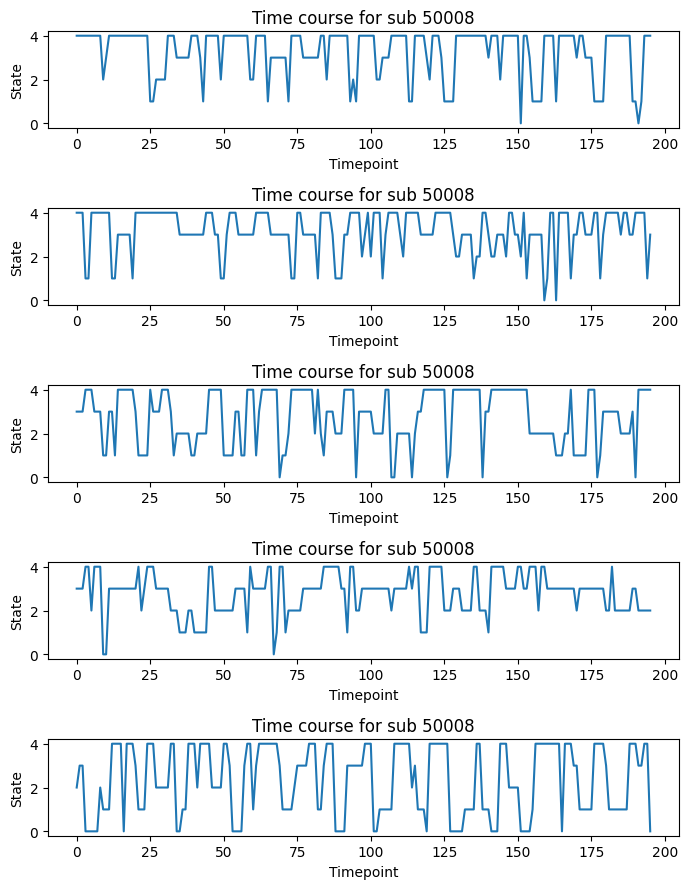

In [ ]:
ksvd = connectivity.KSVD(ts, n_states=5)
state_tc, states = ksvd.estimate()

# Plot all estimated states
fig, ax = plt.subplots(1, 5, figsize=(8,2))
for i in range(states.shape[2]):
    ax[i].imshow(states[:,:,i])
    ax[i].set_title(f"State {i}")
    ax[i].axis("off")

fig, ax = plt.subplots(5, 1, figsize=(7,9))
for i in range(states.shape[2]):
    ax[i].plot(state_tc[i,:])
    ax[i].set(title=f"Time course for sub {subjects[0]}", xlabel="Timepoint", ylabel="State")

plt.tight_layout();

100%|██████████| 5/5 [00:46<00:00,  9.31s/it]


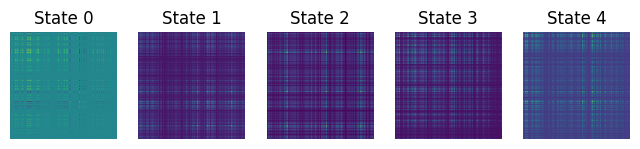

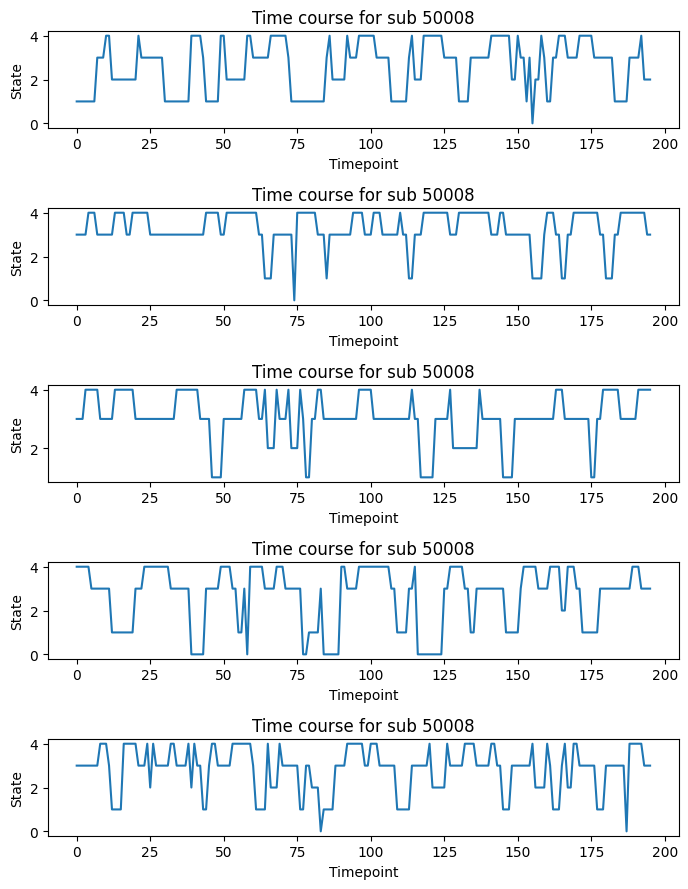

In [3]:
cap = connectivity.CoactivationPatterns(ts, n_states=5)
state_tc, states = cap.estimate()

# Plot all estimated states
fig, ax = plt.subplots(1, 5, figsize=(8,2))
for i in range(states.shape[2]):
    ax[i].imshow(states[:,:,i])
    ax[i].set_title(f"State {i}")
    ax[i].axis("off")

fig, ax = plt.subplots(5, 1, figsize=(7,9))
for i in range(states.shape[2]):
    ax[i].plot(state_tc[i,:])
    ax[i].set(title=f"Time course for sub {subjects[0]}", xlabel="Timepoint", ylabel="State")

plt.tight_layout();

State metrics can also be extracted from the summary as follows:

Dwell times (mean ± sd):
 [0.028 0.147 0.068 0.448 0.309] ± [0.045 0.066 0.058 0.083 0.069]
Mean transition matrix:
 [[0.157 0.109 0.2   0.017 0.317]
 [0.    0.721 0.    0.258 0.021]
 [0.011 0.    0.546 0.    0.243]
 [0.018 0.08  0.002 0.766 0.134]
 [0.003 0.    0.061 0.222 0.713]]


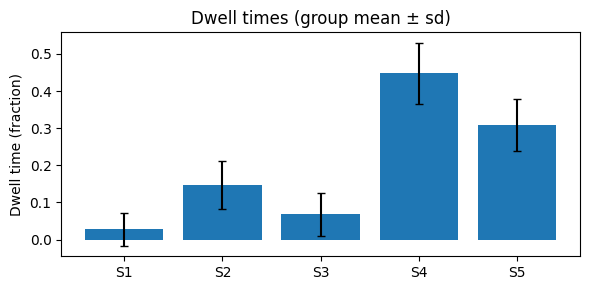

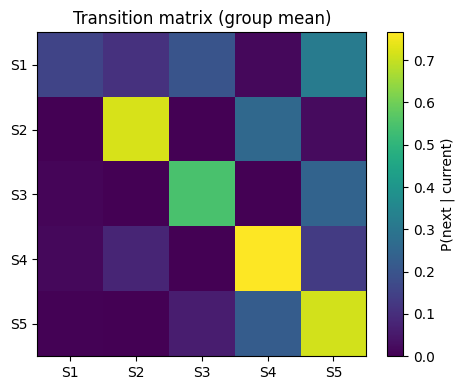

In [8]:
summary = cap.summarise()

dwell_mean = summary["dwell_mean"]
dwell_std = summary["dwell_std"]
trans_mean = summary["trans_mean"]

print("Dwell times (mean ± sd):\n", np.round(dwell_mean, 3), "±", np.round(dwell_std, 3))
print("Mean transition matrix:\n",  np.round(trans_mean, 3))

# Example plots
K = states.shape[-1]

# Group dwell times (mean ± sd)
plt.figure(figsize=(6, 3))
plt.bar(range(K), dwell_mean, yerr=dwell_std, capsize=3)
plt.xticks(range(K), [f"S{k}" for k in range(1,K+1)])
plt.ylabel("Dwell time (fraction)")
plt.title("Dwell times (group mean ± sd)")
plt.tight_layout()
plt.show()

# Mean transition matrix
plt.figure(figsize=(4.8, 4))
plt.imshow(trans_mean, interpolation='nearest', aspect='auto')
plt.colorbar(label="P(next | current)")
plt.xticks(range(K), [f"S{k}" for k in range(1,K+1)])
plt.yticks(range(K), [f"S{k}" for k in range(1,K+1)])
plt.title("Transition matrix (group mean)")
plt.tight_layout()
plt.show()